In [122]:
# !pip install --upgrade pip

In [123]:
# !pip install yfinance

In [124]:
# import libraries

import numpy as np 
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import StandardScaler # use it because kmean is sentsitive for the wide range of features, then we apply it for normalization

import matplotlib.pyplot as plt 
%matplotlib inline

In [125]:
start = "2010-01-01"
end = "2023-12-31"

In [126]:
aapl_df = yf.download("AAPL", start = start, end = end, progress = False) # raw data
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [127]:
aapl_df.shape

(3522, 6)

In [128]:
aapl_df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=3522, freq=None)

In [129]:
type(aapl_df)

pandas.core.frame.DataFrame

In [130]:
stock = aapl_df.copy()
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [131]:
stock.shape

(3522, 6)

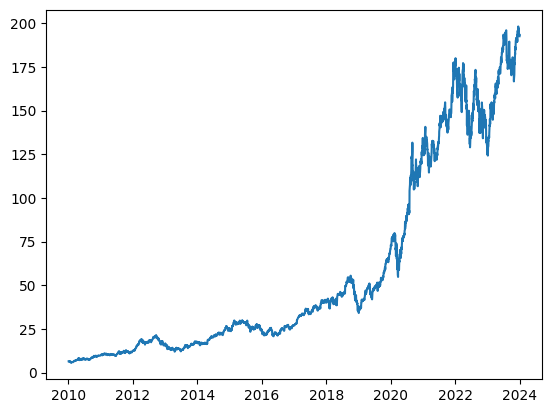

In [132]:
# plot 

plt.plot(stock['Adj Close'])

In [133]:
# get feature for clustering

# calculate log return
stock['Log Rets'] = np.log(stock['Adj Close'] / stock['Adj Close'].shift(1))
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800,0.001728
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000,-0.016034
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200,-0.001850
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800,0.006626


In [134]:
stock.shape

(3522, 7)

In [135]:
stock.dropna(inplace = True)

In [136]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800,0.001728
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000,-0.016034
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200,-0.001850
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800,0.006626
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.360929,462229600,-0.008861


In [137]:
stock.shape

(3521, 7)

In [138]:
# prepare features to be used for clustering

stock['Rets Mean'] = stock['Log Rets'].rolling(5).mean() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean
Date,,,,,,,,
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800,0.001728,NaN
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000,-0.016034,NaN
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200,-0.001850,NaN
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800,0.006626,NaN
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.360929,462229600,-0.008861,-0.003678


In [139]:
stock['Rets STD'] = stock['Log Rets'].rolling(5).std() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800,0.001728,NaN,NaN
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000,-0.016034,NaN,NaN
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200,-0.001850,NaN,NaN
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800,0.006626,NaN,NaN
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.360929,462229600,-0.008861,-0.003678,0.00892


In [140]:
stock.dropna(inplace = True)
stock.head()

# or we can use
# stock = stock.dropna()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.360929,462229600,-0.008861,-0.003678,0.008920
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.288572,594459600,-0.011440,-0.006312,0.008869
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.377276,605892000,0.014007,-0.000304,0.010636
2010-01-14,7.503929,7.516429,7.465000,7.479643,6.340341,432894000,-0.005809,-0.001095,0.010923
2010-01-15,7.533214,7.557143,7.352500,7.354643,6.234381,594067600,-0.016853,-0.005791,0.011786


In [141]:
stock.shape

(3517, 9)

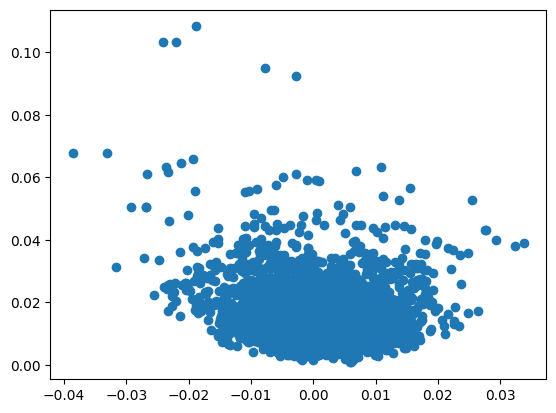

In [142]:
# plot

plt.scatter(stock['Rets Mean'], stock['Rets STD']); # plot X and y

In [143]:
# get array X in order to perform clustering

X1 = stock['Rets Mean']
X1

Date
2010-01-11   -0.003678
2010-01-12   -0.006312
2010-01-13   -0.000304
2010-01-14   -0.001095
2010-01-15   -0.005791
                ...   
2023-12-22   -0.004060
2023-12-26   -0.002921
2023-12-27   -0.003886
2023-12-28   -0.001287
2023-12-29   -0.002221
Name: Rets Mean, Length: 3517, dtype: float64

In [144]:
type(X1)

pandas.core.series.Series

In [145]:
X2 = stock['Rets STD']
X2

Date
2010-01-11    0.008920
2010-01-12    0.008869
2010-01-13    0.010636
2010-01-14    0.010923
2010-01-15    0.011786
                ...   
2023-12-22    0.006455
2023-12-26    0.005950
2023-12-27    0.004484
2023-12-28    0.003023
2023-12-29    0.003506
Name: Rets STD, Length: 3517, dtype: float64

In [146]:
type(X2)

pandas.core.series.Series

In [147]:
X1 = stock['Rets Mean'].values
X1

array([-0.00367825, -0.00631186, -0.00030361, ..., -0.00388641,
       -0.0012873 , -0.00222103])

In [148]:
X2 = stock['Rets STD'].values
X2

array([0.00892013, 0.00886882, 0.01063564, ..., 0.0044836 , 0.00302329,
       0.00350608])

In [149]:
type(X1), type(X2)

(numpy.ndarray, numpy.ndarray)

In [150]:
X = np.array(list(zip(X1, X2)))
X

array([[-0.00367825,  0.00892013],
       [-0.00631186,  0.00886882],
       [-0.00030361,  0.01063564],
       ...,
       [-0.00388641,  0.0044836 ],
       [-0.0012873 ,  0.00302329],
       [-0.00222103,  0.00350608]])

In [151]:
type(X)

numpy.ndarray

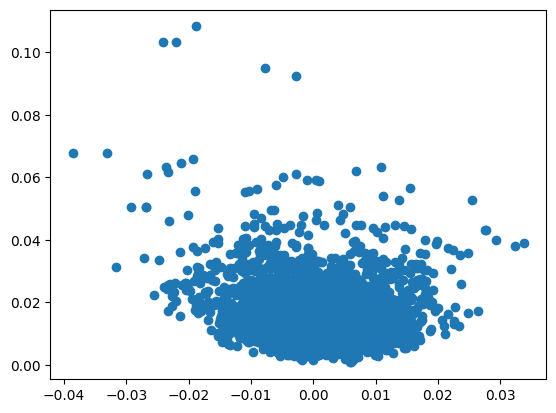

In [152]:
# plot 

plt.scatter(X[:, 0], X[:, 1]); # not need to use stock dataframe

In [153]:
# feature X are not bad but require normalization for kmean - better

def normalizedFeature(x):
    sc = StandardScaler()
    x = sc.fit_transform(x)

    return x


In [154]:
# call a function and keep data in X_norm
X_norm = normalizedFeature(X)
X_norm

array([[-0.61053712, -0.65389111],
       [-0.95664171, -0.65924055],
       [-0.16704792, -0.47503704],
       ...,
       [-0.63789395, -1.11643065],
       [-0.29632331, -1.26867845],
       [-0.41903249, -1.21834478]])

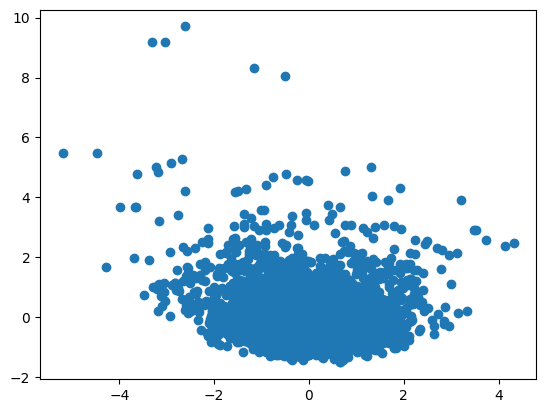

In [155]:
# plot 

plt.scatter(X_norm[:, 0], X_norm[:, 1]);

In [156]:
# start KMean Clustering

# prepare a function for distance between 2 points

def distance_fn(a, b, ax = 1):
    return np.linalg.norm(a-b, axis = ax) # Euclidean distance

In [157]:
def plotCluster(data, C, K, cluster_label):

    colors = ['green', 'blue', 'orange', 'red', 'yellow', 'pink', 'purple', 'salmon']

    plt.figure(figsize = (8, 6))

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i]) # find data for each cluster
        plt.scatter(points[:, 0], points[:, 1], s = 7, c = colors[i]) # plot
        plt.annotate(i, (C[i, 0], C[i, 1]), size = 20)
        
    plt.scatter(C[:, 0], C[:, 1], marker = '*', color = 'black', s = 200)

    plt.xlabel('Variable #1')
    plt.ylabel('Variable #2')
    plt.title('Cluster')

In [158]:
def kmeanClustering(data, K):

    # step 1. random centroids
    C_x = np.random.randint(np.min(data[:, 0]), np.max(data[:, 0]), size = K)
    C_y = np.random.randint(np.min(data[:, 1]), np.max(data[:, 1]), size = K)

    # set Centroid to variable C
    C = np.zeros((K, 2))
    C_old = np.zeros(C.shape)

    C[:, 0] = C_x 
    C[:, 1] = C_y 

    # Step 2. label data
    cluster_label = np.zeros((len(data), 1))

    for i in range(len(data)): # run 150 rounds - depands on length of data
        distance = distance_fn(data[i, :], C)
        cluster = np.argmin(distance) # for the shortest distance
        cluster_label[i] = cluster

    # Step 3. calculate new centroids
    C_old = C.copy()

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
        C[i] = np.mean(points, axis = 0) # calculate mean and keep in C for each group (i)

    # Calculate error
    error = distance_fn(C, C_old, None)
    
    # Plot
    plotCluster(data, C, K, cluster_label)

    # Check if error is ok to stop
    while error != 0: # will stop when error = 0
    
        cluster_label = np.zeros((len(data), 1))
    
        for i in range(len(data)):
            distance = distance_fn(data[i, :], C)
            cluster = np.argmin(distance)
            cluster_label[i] = cluster
    
        C_old = C.copy()
    
        for i in range(K):
            points = []
            points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
            C[i] = np.mean(points, axis=0)
        
        plotCluster(data, C, K, cluster_label.copy())
    
        error = distance_fn(C, C_old, None)
        print(error)

    return cluster_label

0.5326965404859282
0.2933468841572968
0.15622608788361028
0.10249981075345334
0.061257802582585834
0.04596343996944609
0.030573843445655516
0.03005749817542563
0.016820644715954406
0.01794266672705485
0.02253915143197966
0.018532661419784813
0.013673554253585896
0.01205253655085273
0.009019670523421185


0.008022908519621284
0.01685408027090457
0.015348159044727323
0.0057845248568447645
0.0031192198841399872


/var/folders/0z/2gy2pkss67v3rwygb64_tfvm0000gn/T/ipykernel_69340/3225941393.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (8, 6))


0.004072525029039539
0.002541926294799698
0.0016512063018536106
0.0029341360047764023
0.003439254839609765
0.0019131327418197342
0.0


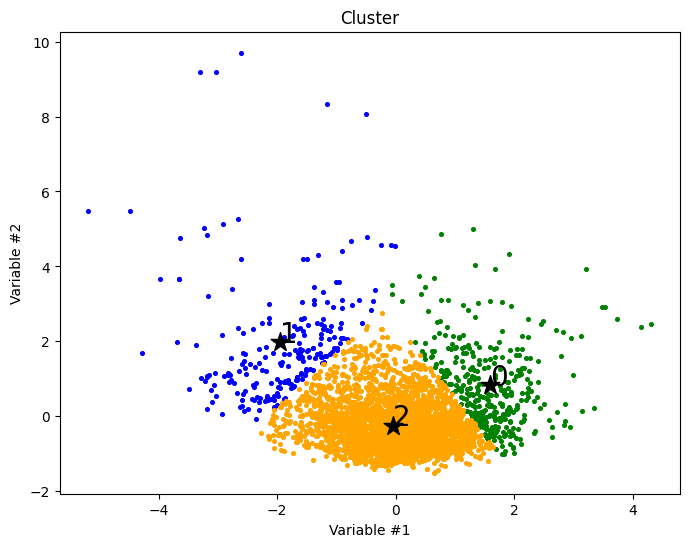

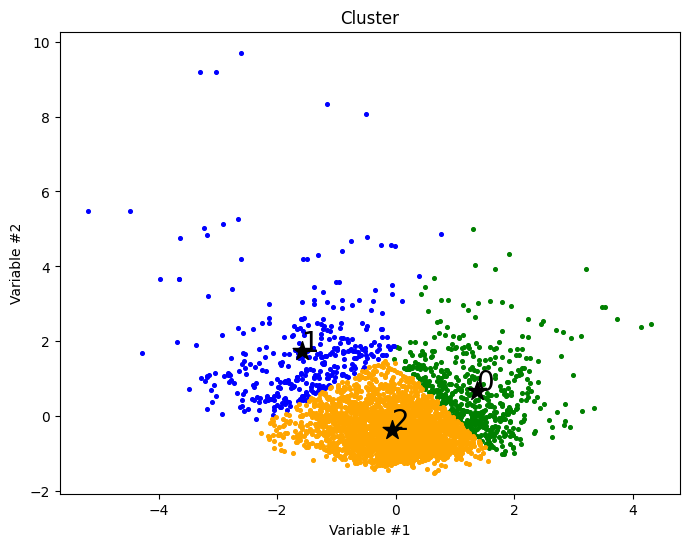

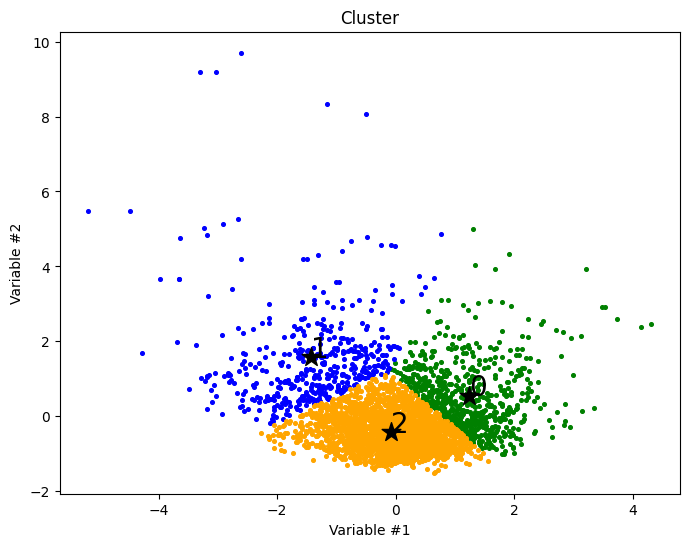

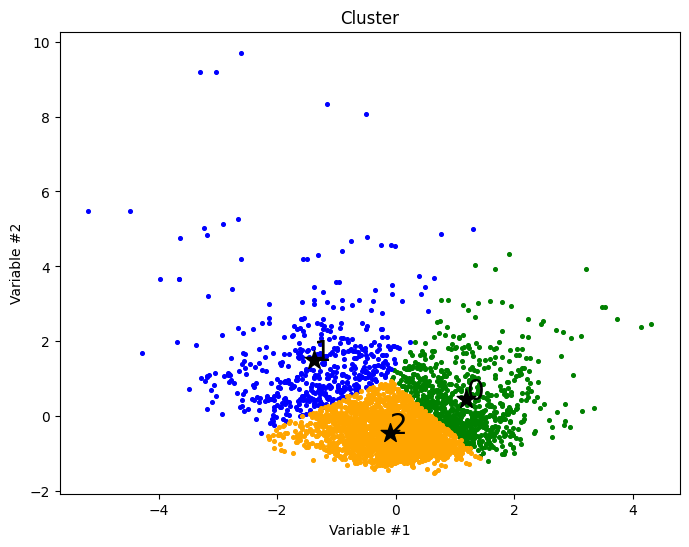

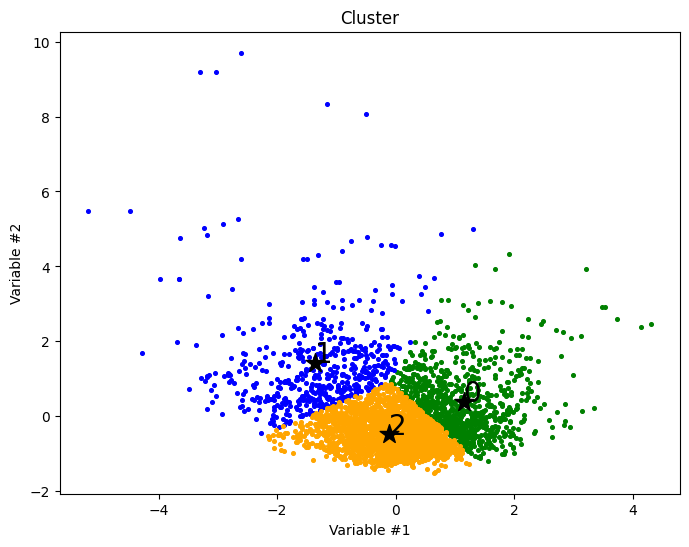

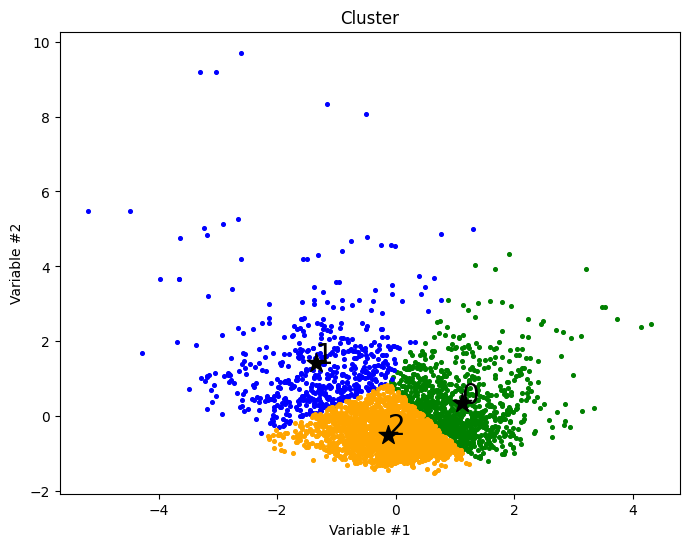

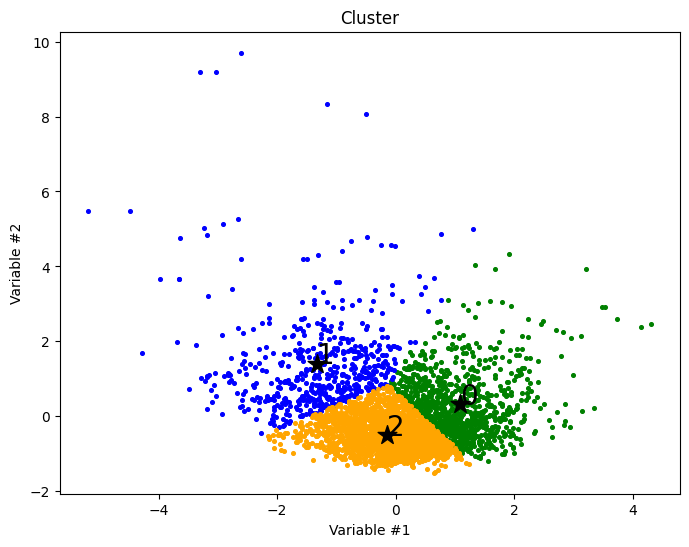

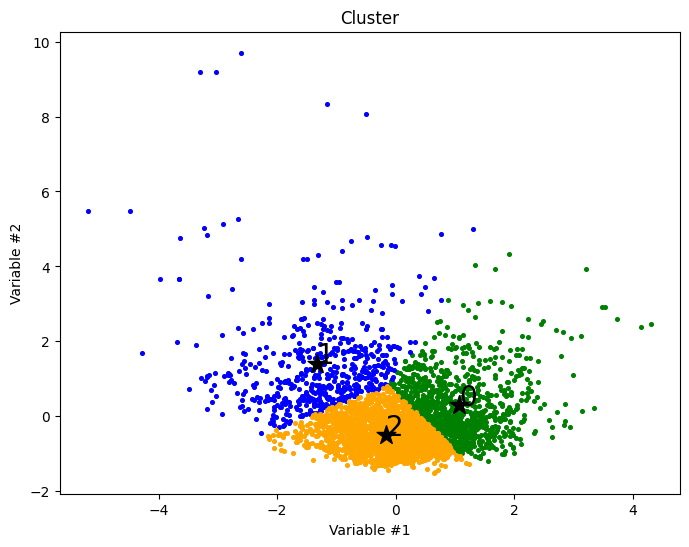

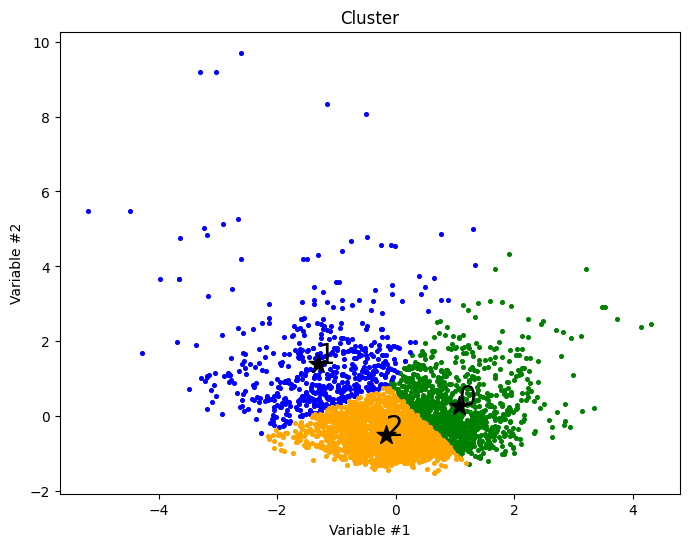

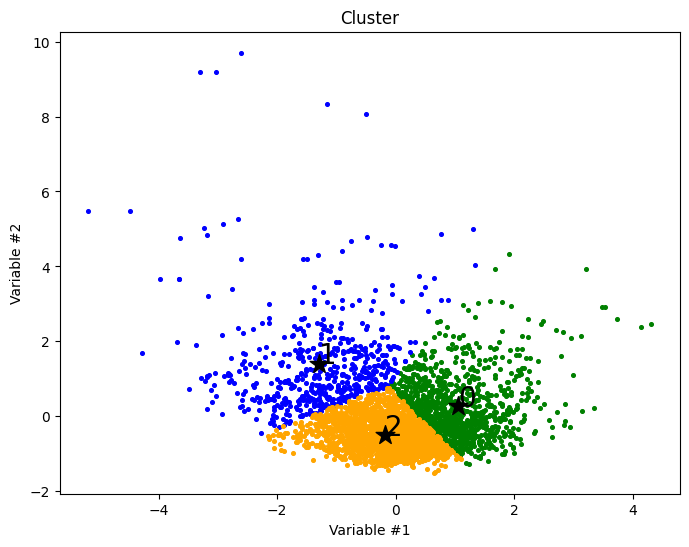

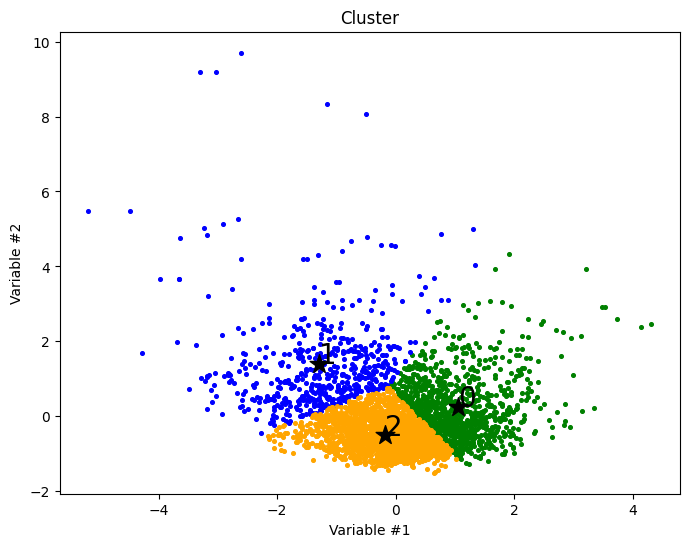

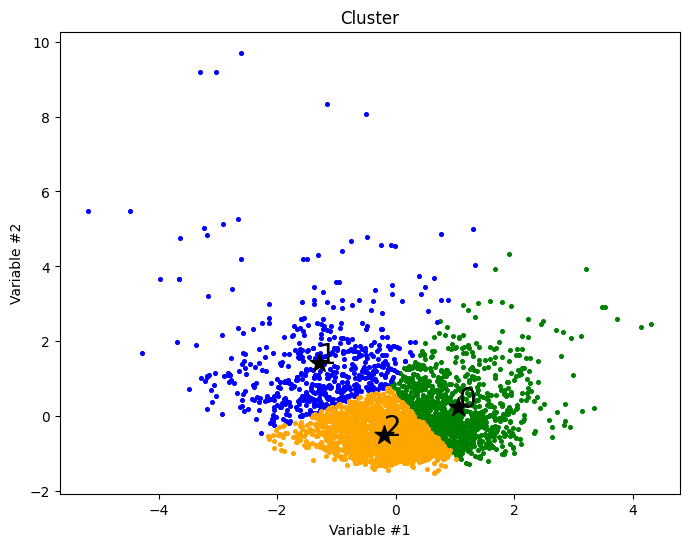

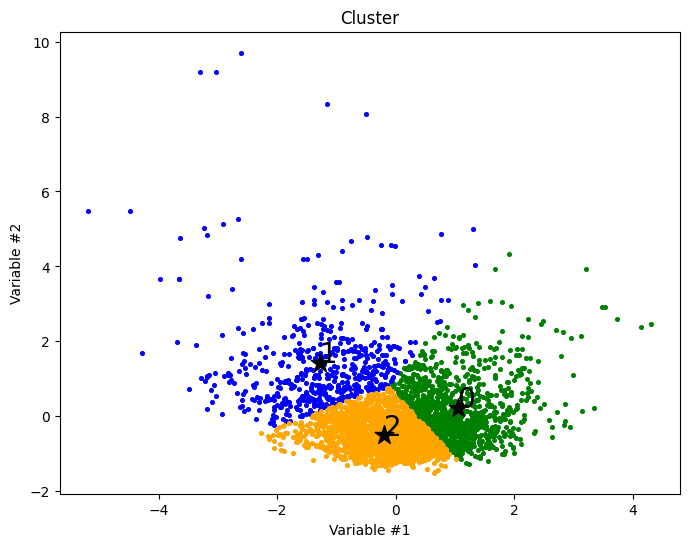

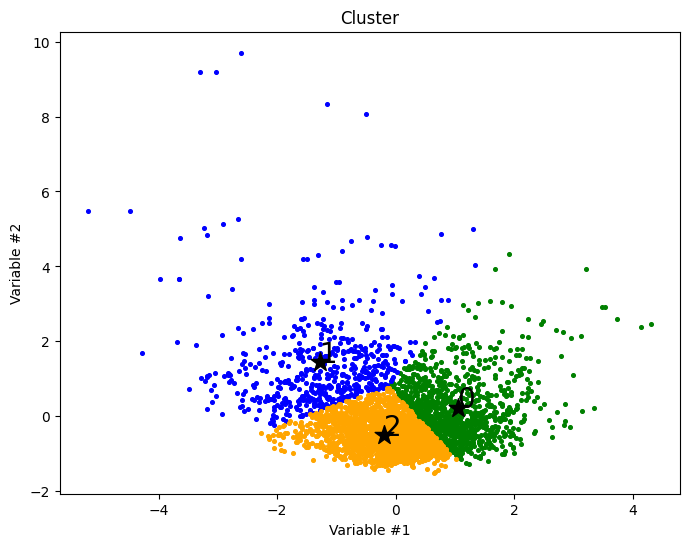

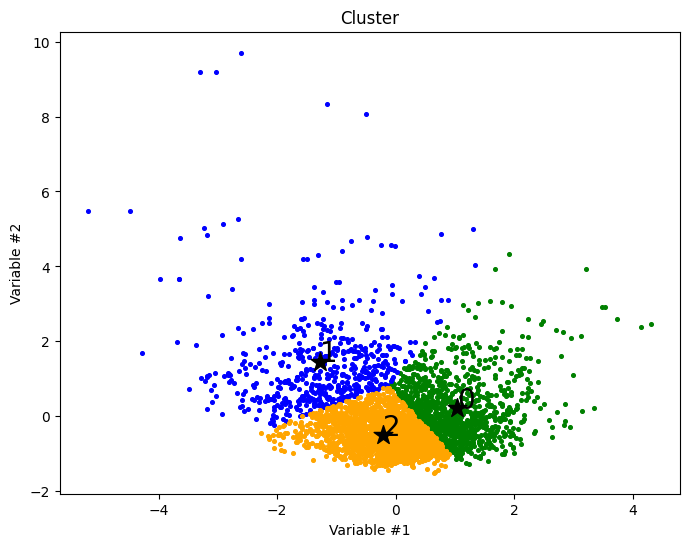

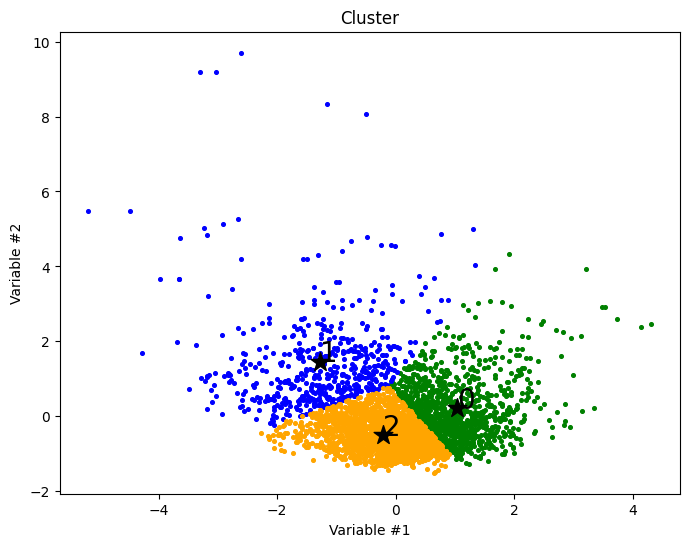

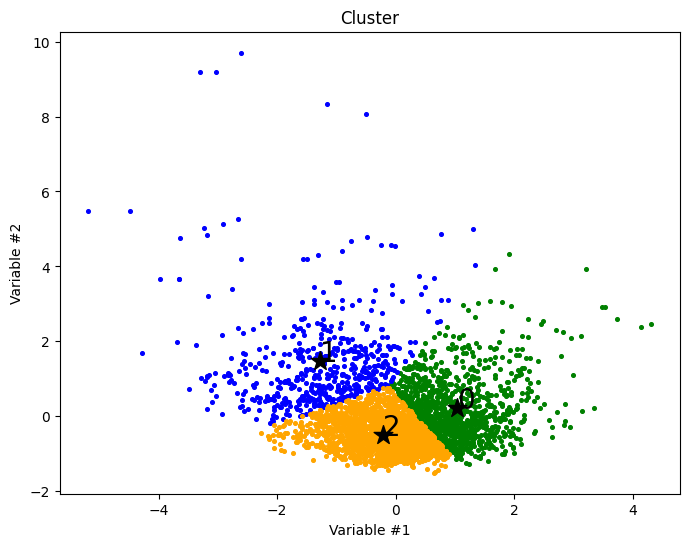

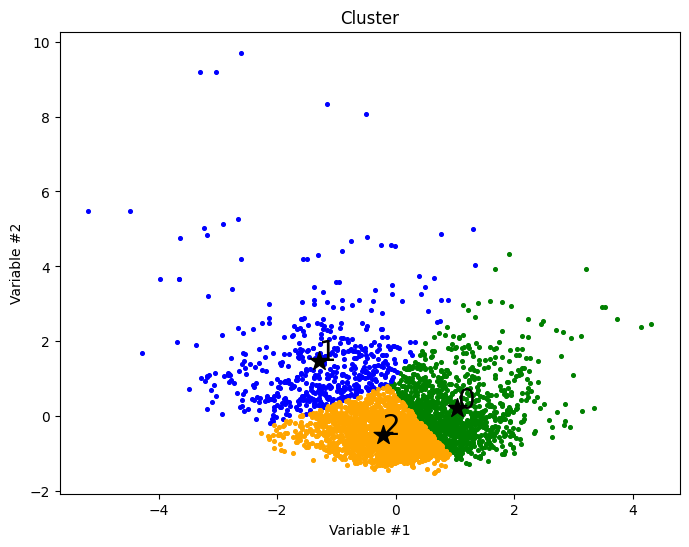

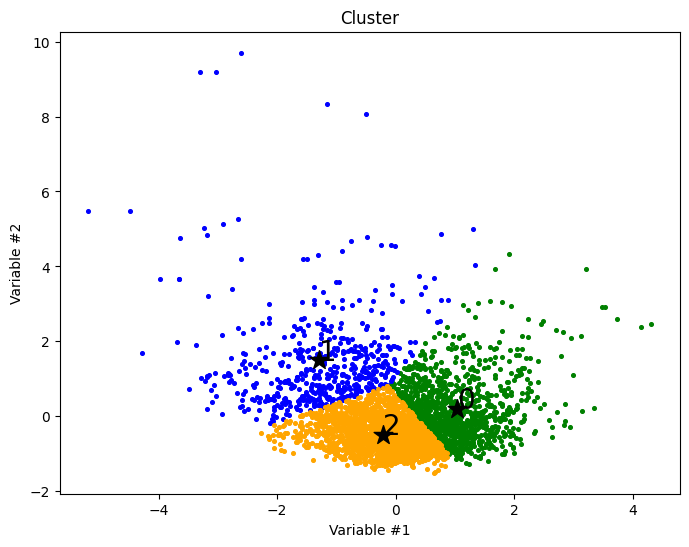

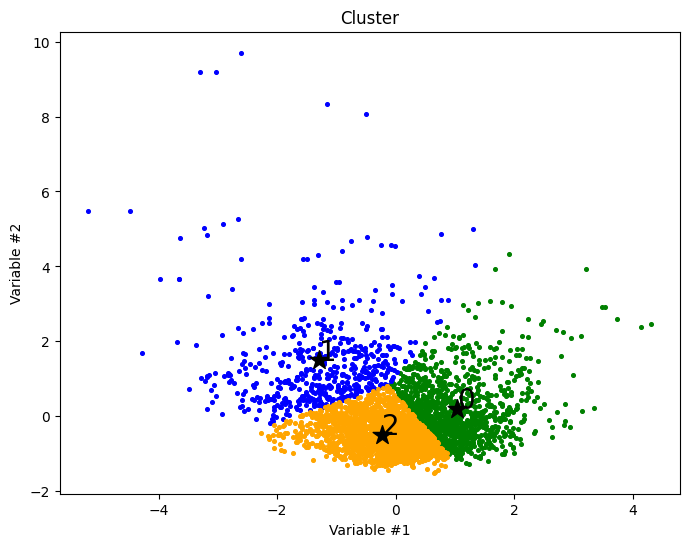

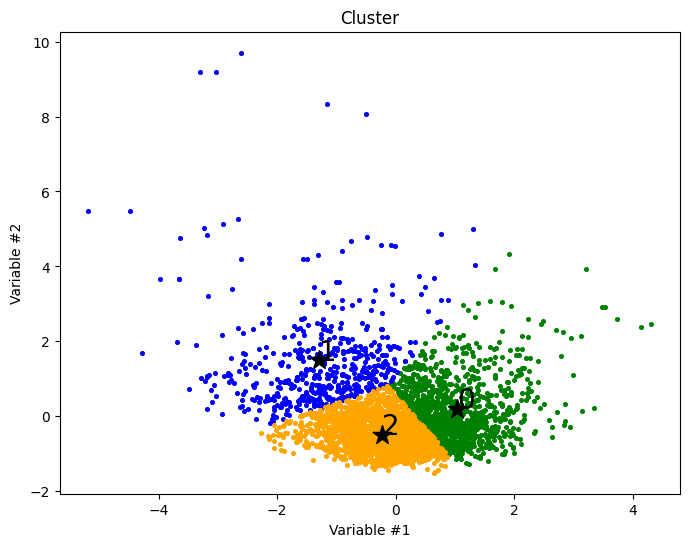

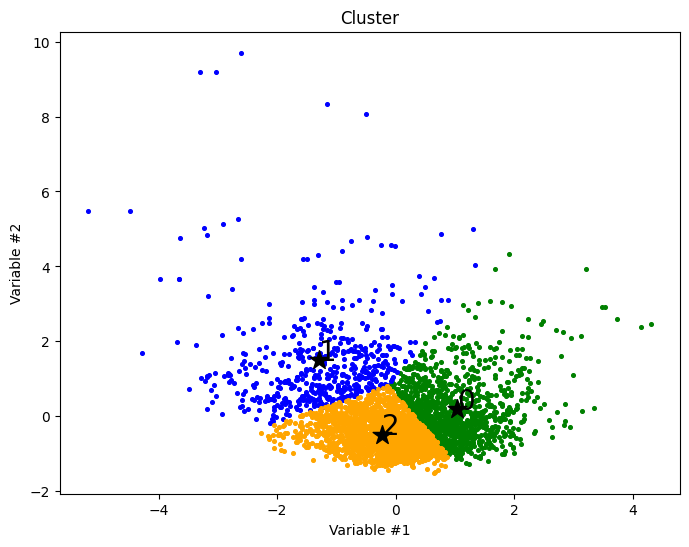

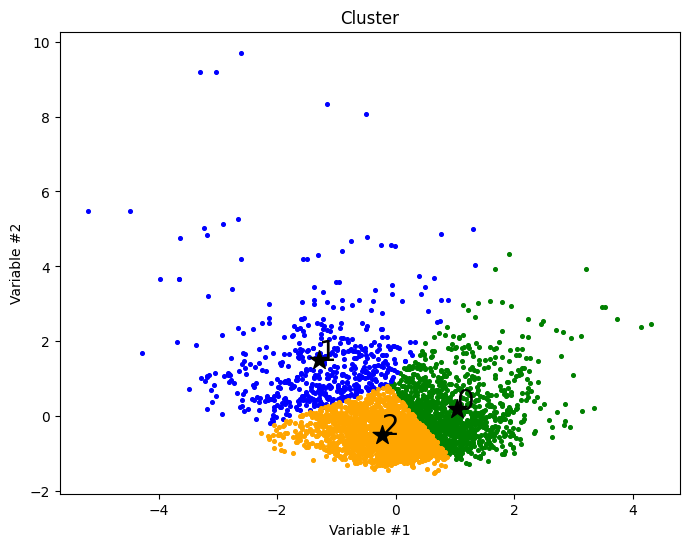

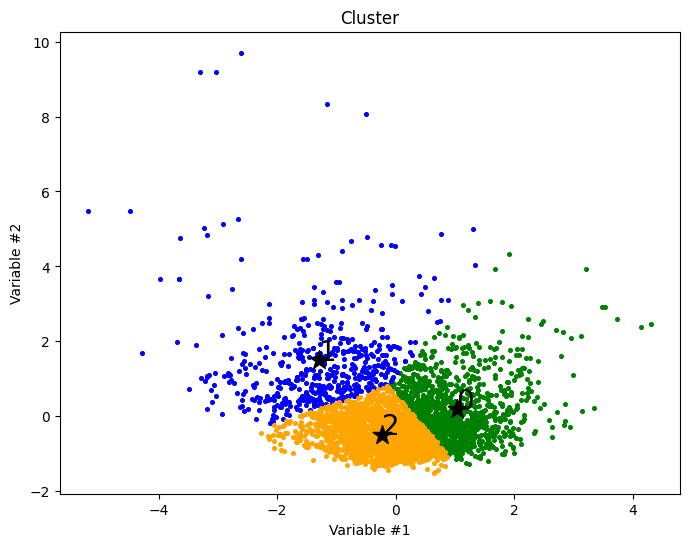

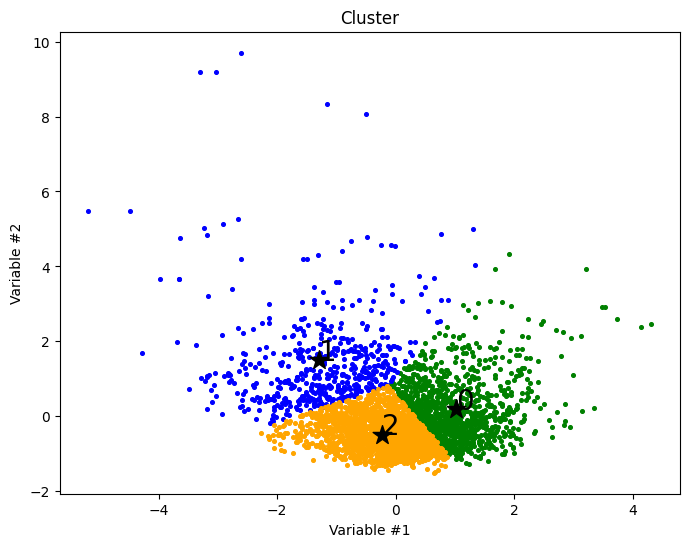

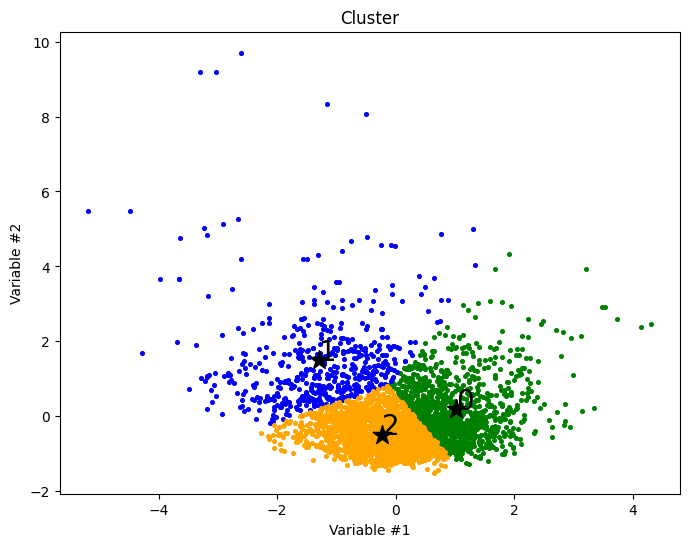

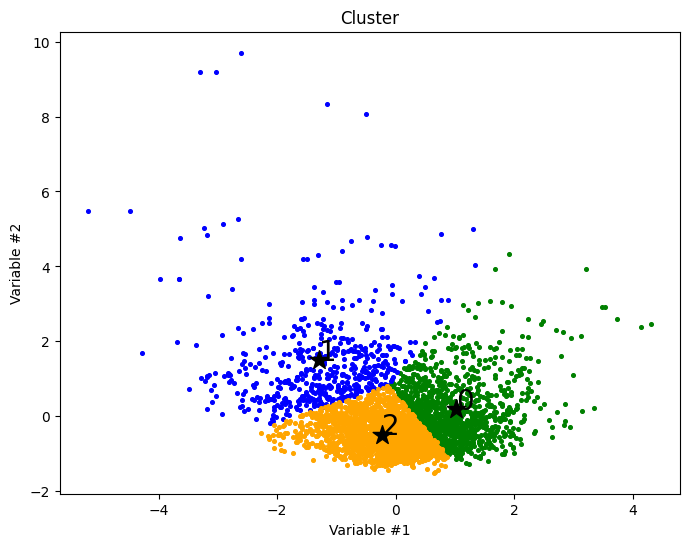

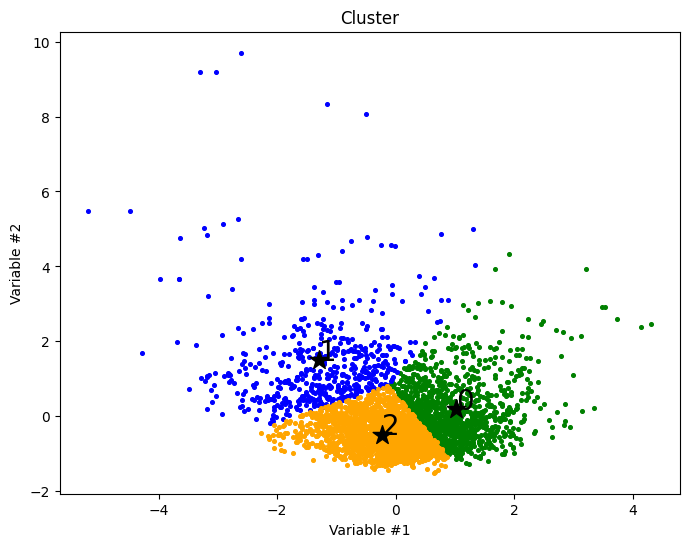

In [159]:
# call a function
K = 3
label_kmean = kmeanClustering(X_norm, K)

In [160]:
label_kmean

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [2.],
       [2.]])

### Use label from KMean

In [161]:
stock['Class'] = label_kmean 
stock.head(10)

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD,Class
Date,,,,,,,,,,
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.360929,462229600,-0.008861,-0.003678,0.008920,2.0
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.288572,594459600,-0.011440,-0.006312,0.008869,2.0
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.377276,605892000,0.014007,-0.000304,0.010636,2.0
2010-01-14,7.503929,7.516429,7.465000,7.479643,6.340341,432894000,-0.005809,-0.001095,0.010923,2.0
2010-01-15,7.533214,7.557143,7.352500,7.354643,6.234381,594067600,-0.016853,-0.005791,0.011786,2.0
2010-01-19,7.440357,7.685357,7.401429,7.680000,6.510180,730007600,0.043288,0.004639,0.024552,0.0
2010-01-20,7.675357,7.698214,7.482143,7.561786,6.409974,612152800,-0.015512,0.003824,0.025275,0.0
2010-01-21,7.574286,7.618214,7.400357,7.431071,6.299169,608154400,-0.017438,-0.002465,0.026009,1.0
2010-01-22,7.385000,7.410714,7.041429,7.062500,5.986738,881767600,-0.050871,-0.011477,0.034029,1.0


In [162]:
# idea to trade

idx_c0 = np.where(stock['Class'] == 0) # find index in class 0
idx_c0

(array([   5,    6,   18, ..., 3487, 3502, 3505]),)

In [163]:
len(idx_c0)

1

In [164]:
len(idx_c0[0])

1076

In [165]:
idx_c1 = np.where(stock['Class'] == 1)
idx_c1

(array([   7,    8,    9,   10,   11,   12,   13,   14,   15,   16,   17,
          21,   76,   77,   78,   79,   80,   81,   82,   83,   84,   90,
          91,   92,   93,   94,  104,  105,  117,  118,  119,  120,  121,
         151,  217,  261,  281,  282,  283,  284,  297,  298,  299,  300,
         301,  364,  395,  396,  397,  398,  399,  400,  401,  405,  406,
         407,  408,  409,  448,  449,  450,  451,  452,  464,  465,  466,
         467,  473,  475,  570,  571,  572,  573,  574,  575,  576,  577,
         578,  580,  581,  584,  595,  596,  640,  641,  642,  643,  686,
         687,  701,  702,  703,  704,  705,  706,  710,  712,  713,  714,
         715,  716,  717,  731,  732,  733,  734,  735,  738,  739,  740,
         741,  742,  753,  757,  758,  759,  760,  761,  762,  764,  765,
         766,  767,  768,  791,  792,  793,  809,  810,  811,  821,  822,
         823,  824,  825,  841,  842,  843,  844,  923,  924,  925,  926,
         927, 1018, 1019, 1020, 1021, 

In [166]:
len(idx_c1[0])

501

In [167]:
idx_c2 = np.where(stock['Class'] == 2)
idx_c2

(array([   0,    1,    2, ..., 3514, 3515, 3516]),)

In [168]:
len(idx_c2[0])

1940

In [169]:
len(stock), len(idx_c0[0]) + len(idx_c1[0]) + len(idx_c2[0])

(3517, 3517)

In [170]:
# if we would like to trade only some class

profit_c0 = stock['Log Rets']
profit_c0

Date
2010-01-11   -0.008861
2010-01-12   -0.011440
2010-01-13    0.014007
2010-01-14   -0.005809
2010-01-15   -0.016853
                ...   
2023-12-22   -0.005563
2023-12-26   -0.002845
2023-12-27    0.000518
2023-12-28    0.002224
2023-12-29   -0.005439
Name: Log Rets, Length: 3517, dtype: float64

In [171]:
type(profit_c0)

pandas.core.series.Series

In [172]:
profit_c0 = np.array(profit_c0).reshape(-1, 1)
profit_c0

array([[-0.00886066],
       [-0.01144045],
       [ 0.01400712],
       ...,
       [ 0.00051782],
       [ 0.00222382],
       [-0.00543889]])

In [173]:
profit_c0[idx_c1, 0] = 0
profit_c0[idx_c2, 0] = 0
profit_c0

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

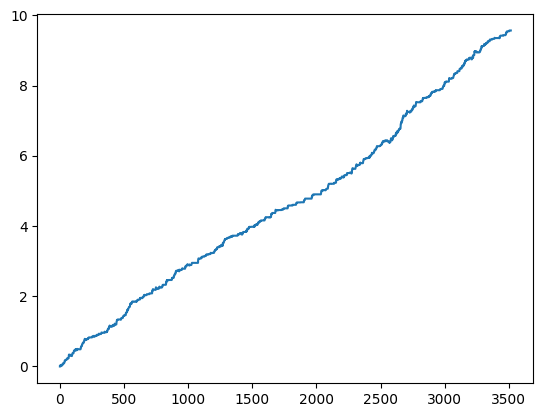

In [174]:
plt.plot(profit_c0.cumsum())

In [175]:
profit_c1 = np.array(stock['Log Rets']).reshape(-1, 1)
profit_c1

array([[-0.00886066],
       [-0.01144045],
       [ 0.01400712],
       ...,
       [ 0.00051782],
       [ 0.00222382],
       [-0.00543889]])

In [176]:
profit_c1[idx_c0, 0] = 0
profit_c1[idx_c2, 0] = 0
profit_c1

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

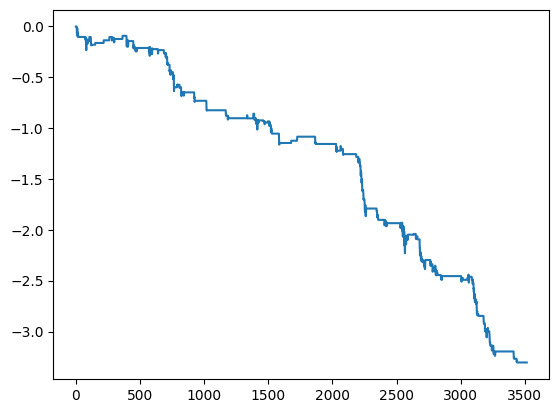

In [177]:
plt.plot(profit_c1.cumsum())

In [178]:
profit_c2 = np.array(stock['Log Rets']).reshape(-1, 1)
profit_c2

array([[-0.00886066],
       [-0.01144045],
       [ 0.01400712],
       ...,
       [ 0.00051782],
       [ 0.00222382],
       [-0.00543889]])

In [179]:
profit_c2[idx_c0, 0] = 0
profit_c2[idx_c1, 0] = 0
profit_c2

array([[-0.00886066],
       [-0.01144045],
       [ 0.01400712],
       ...,
       [ 0.00051782],
       [ 0.00222382],
       [-0.00543889]])

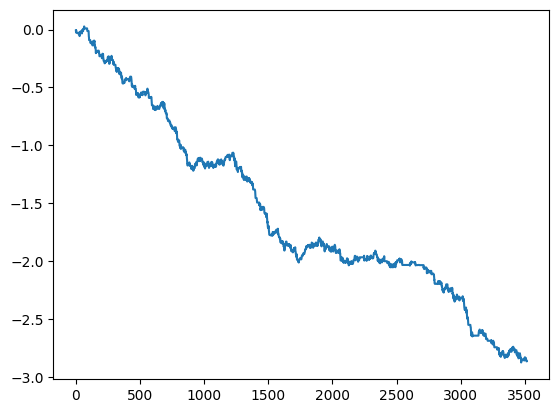

In [180]:
plt.plot(profit_c2.cumsum())

*** Require to select the correct class and time before trade
- What we require to do more
    - Lock ahead bias
    - In sample & Out sample

In [181]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD,Class
Date,,,,,,,,,,
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.360929,462229600,-0.008861,-0.003678,0.008920,2.0
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.288572,594459600,-0.011440,-0.006312,0.008869,2.0
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.377276,605892000,0.014007,-0.000304,0.010636,2.0
2010-01-14,7.503929,7.516429,7.465000,7.479643,6.340341,432894000,-0.005809,-0.001095,0.010923,2.0
2010-01-15,7.533214,7.557143,7.352500,7.354643,6.234381,594067600,-0.016853,-0.005791,0.011786,2.0
